<a href="https://colab.research.google.com/github/laugustovieira/BootCamp-Data-Science/blob/main/Desafios_Modulo2_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modulo 02 Aula 02

#Importar Bibliotecas

In [1169]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Carregar informações

In [1170]:
dados = pd.read_csv("/content/drive/MyDrive/Dados_BootCamp/A005117189_28_143_208_2021_ATENDIMENTO.csv", encoding="ISO-8859-1",
            sep=";", skiprows = 3, skipfooter = 12, engine = "python", thousands = ".", decimal = ",")

#Tratar Dados

In [1171]:
pd.options.display.float_format = "{:.2f}".format


In [1172]:
def retorna_tabela(indice_mes_selecionado):
  colunas_usaveis_def3 = dados.mean().index.tolist()
  colunas_usaveis_def3.insert(0,"Unidade da Federação")

  usaveis_def3 = dados[colunas_usaveis_def3]
  usaveis_def3= usaveis_def3.drop("Total", axis=1)
  usaveis_def3 = usaveis_def3.set_index("Unidade da Federação")
  usaveis_ordenado = usaveis_def3.sort_values(by="Unidade da Federação", ascending=False)

  usaveis_ordenado = usaveis_ordenado[usaveis_ordenado.columns[indice_mes_selecionado:]]

  #usaveis_ordenado = usaveis_ordenado.sort_values(by=""coluna"", ascending =False)
  usaveis_ordenado.index = usaveis_ordenado.index.str[3:]
  return usaveis_ordenado

In [1173]:
usaveis_ordenado = retorna_tabela(-1)
usaveis_ordenado.head()

,2021/Mar
Unidade da Federação,
Distrito Federal,14731938.43
Goiás,24867001.02
Mato Grosso,8835890.09
Mato Grosso do Sul,4035989.77
Rio Grande do Sul,37798832.80


In [1174]:
usaveis_ordenado = retorna_tabela(-1)
usaveis_ordenado.head()

,2021/Mar
Unidade da Federação,
Distrito Federal,14731938.43
Goiás,24867001.02
Mato Grosso,8835890.09
Mato Grosso do Sul,4035989.77
Rio Grande do Sul,37798832.80


In [1175]:
#Fazendo a leitura da pagina html onde tem o <td>População (a tabela é identificada e colocada em uma lista.)
html = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o", match="População")
tabela = html[0]
tabela.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [1176]:
#renomeando os nomes das colunas
tabela = tabela.rename(columns={"População":"população","Unidade federativa":"uf",
                               "% da pop. total":"percentual"})
tabela.head()

,Posição,uf,população,percentual,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [1177]:
#retirando os espaços entre os números
tabela["população"] = tabela["população"].str.replace(" ", "")
tabela["percentual"] = tabela["percentual"].str.replace("%","")
tabela["percentual"] = tabela["percentual"].str.replace(",",".")
tabela.head()

,Posição,uf,população,percentual,País comparável (habitantes)
0,1,São Paulo,46289333,21.9,Espanha (46 439 864)
1,2,Minas Gerais,21292666,10.1,Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17366189,8.2,Países Baixos (16 922 900)
3,4,Bahia,14930634,7.1,Chade (14 037 000)
4,5,Paraná,11516840,5.4,Bolívia (11 410 651)


In [1178]:
#alterando os tipos
tabela["uf"] = tabela["uf"].astype(str)
tabela["população"] = tabela["população"].astype(float)
tabela["percentual"] = tabela["percentual"].astype(float)

In [1179]:
#selecionando somente as colunas que interessam
tabela = tabela[["uf", "população"]]
tabela.head()

,uf,população
0,São Paulo,46289333.00
1,Minas Gerais,21292666.00
2,Rio de Janeiro,17366189.00
3,Bahia,14930634.00
4,Paraná,11516840.00


In [1180]:
#setar o índice da tabela
tabela = tabela.set_index("uf")
tabela

,população
uf,
São Paulo,46289333.00
Minas Gerais,21292666.00
Rio de Janeiro,17366189.00
Bahia,14930634.00
Paraná,11516840.00
Rio Grande do Sul,11422973.00
Pernambuco,9616621.00
Ceará,9187103.00
Pará,8690745.00


In [1181]:
def limpeza_tratamento(usaveis_ordenado):

  html = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o", match="População")
  tab = html[0]
  tab = tab.rename(columns={"Unidade federativa": "uf", "População":"população", "% da pop. total":"percentual"})

  tab["população"] = tab["população"].str.replace(" ", "")
  tab["percentual"] = tab["percentual"].str.replace(",",".")
  tab["percentual"] = tab["percentual"].str.replace("%","")

  tab["uf"] = tab["uf"].astype(str)
  tab["população"] = tab["população"].astype(float)
  tab["percentual"] = tab["percentual"].astype(float)

  tab = tab[["uf","população"]]

  tab = tab.set_index("uf")

  unida = tab.join(usaveis_ordenado)

  
  return tab, unida

In [1182]:
tab_retorno, unida_retorno = limpeza_tratamento(usaveis_ordenado)
tab_retorno.head()

,população
uf,
São Paulo,46289333.00
Minas Gerais,21292666.00
Rio de Janeiro,17366189.00
Bahia,14930634.00
Paraná,11516840.00


In [1183]:
unida_retorno.head()

,população,2021/Mar
uf,,
São Paulo,46289333.00,177408317.71
Minas Gerais,21292666.00,79780838.00
Rio de Janeiro,17366189.00,49149884.48
Bahia,14930634.00,31314602.44
Paraná,11516840.00,43480729.07


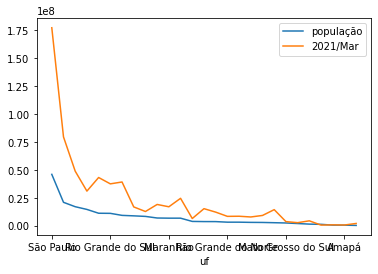

In [1184]:
unida_retorno.plot()

In [1185]:
unida_retorno["gastos"] = unida_retorno["2021/Mar"] 
unida_retorno["gasto_por_habitante"] = unida_retorno["gastos"]/unida_retorno["população"]
unida_retorno.head()

,população,2021/Mar,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333.00,177408317.71,177408317.71,3.83
Minas Gerais,21292666.00,79780838.00,79780838.00,3.75
Rio de Janeiro,17366189.00,49149884.48,49149884.48,2.83
Bahia,14930634.00,31314602.44,31314602.44,2.10
Paraná,11516840.00,43480729.07,43480729.07,3.78


In [1186]:
unida_retorno["gasto_por_habitante"] = unida_retorno["gastos"]/ unida_retorno["população"]
unida_retorno.head()

,população,2021/Mar,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333.00,177408317.71,177408317.71,3.83
Minas Gerais,21292666.00,79780838.00,79780838.00,3.75
Rio de Janeiro,17366189.00,49149884.48,49149884.48,2.83
Bahia,14930634.00,31314602.44,31314602.44,2.10
Paraná,11516840.00,43480729.07,43480729.07,3.78


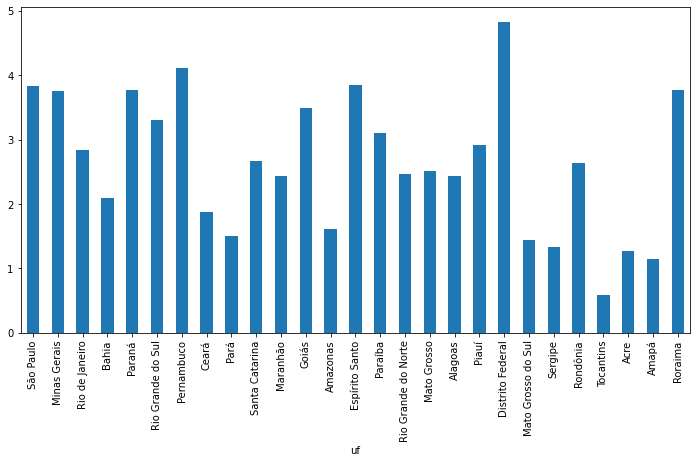

In [1187]:
unida_retorno["gasto_por_habitante"].plot(kind="bar", figsize=(12,6))

#Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

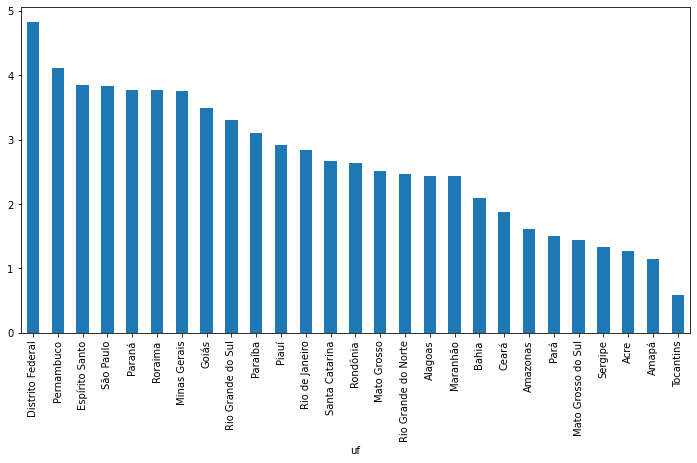

In [1188]:
unida_retorno = unida_retorno.sort_values(by="gasto_por_habitante", ascending=False)
unida_retorno["gasto_por_habitante"].plot(kind="bar", figsize=(12,6))

#Desafios 02 e 03

##Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.
##Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

In [1189]:
usaveis_ordenado = retorna_tabela(-3)
tab_retorno, unida_retorno = limpeza_tratamento(usaveis_ordenado)
unida_retorno.head()

,população,2021/Jan,2021/Fev,2021/Mar
uf,,,,
São Paulo,46289333.00,324115425.70,268193064.06,177408317.71
Minas Gerais,21292666.00,155064483.25,119877417.15,79780838.00
Rio de Janeiro,17366189.00,87201907.99,60873103.08,49149884.48
Bahia,14930634.00,70325599.07,55544579.04,31314602.44
Paraná,11516840.00,106948897.53,83130175.37,43480729.07


In [1190]:
unida_retorno["gasto_por_habitante_jan"] = unida_retorno["2021/Jan"] / unida_retorno["população"]
unida_retorno["gasto_por_habitante_fev"] = unida_retorno["2021/Fev"] / unida_retorno["população"]
unida_retorno["gasto_por_habitante_mar"] = unida_retorno["2021/Mar"] / unida_retorno["população"]
unida_retorno.head()

,população,2021/Jan,2021/Fev,2021/Mar,gasto_por_habitante_jan,gasto_por_habitante_fev,gasto_por_habitante_mar
uf,,,,,,,
São Paulo,46289333.00,324115425.70,268193064.06,177408317.71,7.00,5.79,3.83
Minas Gerais,21292666.00,155064483.25,119877417.15,79780838.00,7.28,5.63,3.75
Rio de Janeiro,17366189.00,87201907.99,60873103.08,49149884.48,5.02,3.51,2.83
Bahia,14930634.00,70325599.07,55544579.04,31314602.44,4.71,3.72,2.10
Paraná,11516840.00,106948897.53,83130175.37,43480729.07,9.29,7.22,3.78


Percebe-se que de janeiro para março de 2021 os gastos de todos os estados (menos tocantins), sofreram uma queda.

Text(0, 0.5, 'Gastos por habitante em R$')

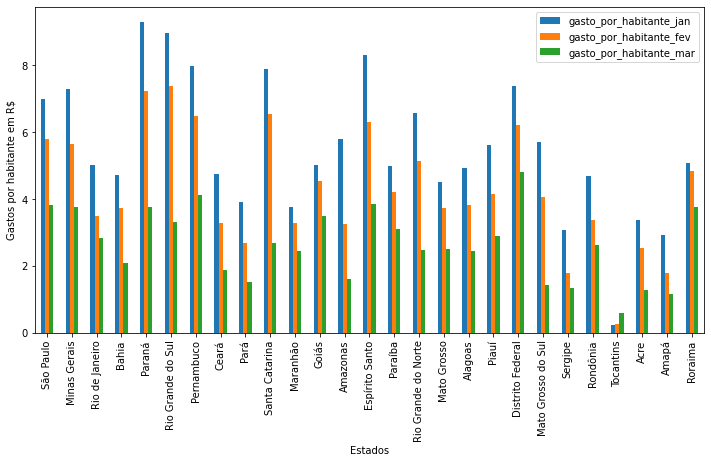

In [1191]:
unida_retorno[["gasto_por_habitante_jan","gasto_por_habitante_fev","gasto_por_habitante_mar"]].plot(figsize=(12,6), kind="bar")
plt.xlabel("Estados")
plt.ylabel("Gastos por habitante em R$")

O comportamento do gráfico para os meses de janeiro a dezembro parecem ter o mesmo comportamento, porém com uma redução do gasto por habitande de um mês para o outro

Text(0, 0.5, 'Gastos em Milhões')

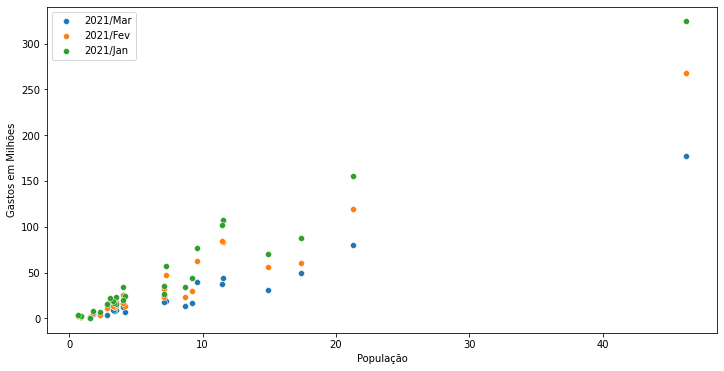

In [1192]:
  import seaborn as sns
  plt.figure(figsize=(12,6))
  label = []
  i = 0
  unida_retorno_gastos = unida_retorno[["2021/Mar","2021/Fev","2021/Jan"]] 
  for mes in unida_retorno_gastos:
     label.insert(i,mes)
     sns.scatterplot(data=unida_retorno/1000000, x="população",y=mes)
     i = i +1
  plt.legend(labels=label)
  plt.xlabel("População")
  plt.ylabel("Gastos em Milhões")


Abaixo temos os 3 meses plotados no mesmo gráfico. Queda de janeiro a março

Text(0, 0.5, 'Gastos por habitante me R$')

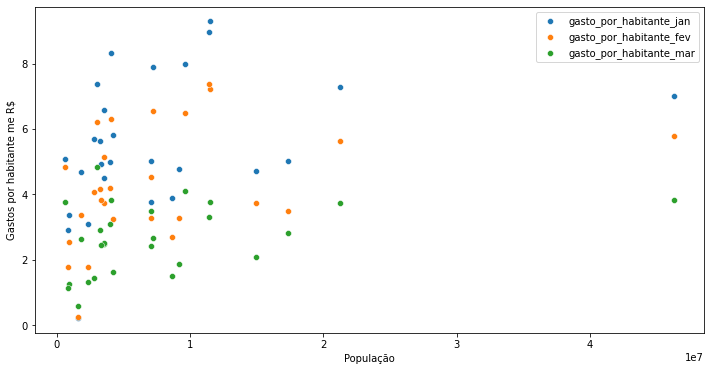

In [1193]:
  plt.figure(figsize=(12,6))
  label = []
  i = 0
  unida_retorno_gastos = unida_retorno[["gasto_por_habitante_jan","gasto_por_habitante_fev","gasto_por_habitante_mar"]]
  for mes in unida_retorno_gastos:
     label.insert(i,mes)
     sns.scatterplot(data=unida_retorno, x="população",y=mes)
     i = i +1
  plt.legend(labels=label)
  plt.xlabel("População")
  plt.ylabel("Gastos por habitante me R$")

Nos gráficos abaixos percebemos com mais clareza a queda, apesar das escalas estarem diferentes

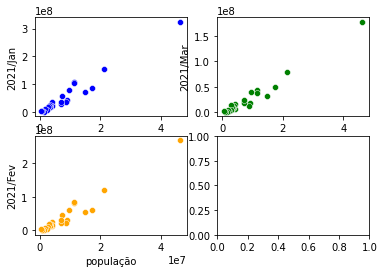

In [1194]:
  fig, axes = plt.subplots(nrows=2, ncols=2)
  unida_retorno_gastos = unida_retorno[["população","2021/Mar","2021/Fev","2021/Jan"]] 
  sns.scatterplot(ax = axes[0,0],data=unida_retorno_gastos, x="população",y='2021/Jan', color = "blue")
  sns.scatterplot(ax = axes[1,0],data=unida_retorno_gastos, x="população",y='2021/Fev', color = "orange")
  sns.scatterplot(ax = axes[0,1],data=unida_retorno_gastos, x="população",y='2021/Mar', color = "green")
  

Para melhorarar a visualização vemos os mesese individualmente com as escalas proporcionais. Percebe- se que o comportamento é uma queda

Text(0, 0.5, 'Gastos em milhôes')

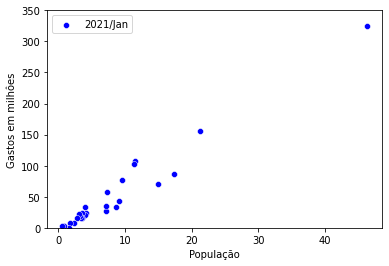

In [1195]:
  unida_retorno_gastos = unida_retorno[["população","2021/Mar","2021/Fev","2021/Jan"]]/1000000
  sns.scatterplot(data=unida_retorno_gastos, x="população",y='2021/Jan', color = "blue")
  plt.ylim(0,350)

  plt.legend(labels=["2021/Jan"])
  plt.xlabel("População")
  plt.ylabel("Gastos em milhôes")

Text(0, 0.5, 'Gastos em milhôes')

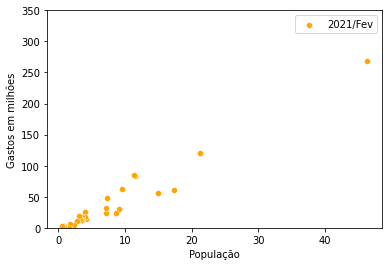

In [1196]:
sns.scatterplot(data=unida_retorno_gastos, x="população",y='2021/Fev', color = "orange")
plt.ylim(0,350)

plt.legend(labels=["2021/Fev"])
plt.xlabel("População")
plt.ylabel("Gastos em milhôes")

Text(0, 0.5, 'Gastos em milhôes')

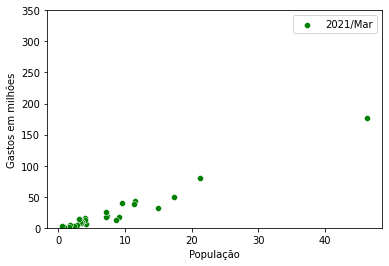

In [1197]:
sns.scatterplot(data=unida_retorno_gastos, x="população",y='2021/Mar', color = "green")
plt.ylim(0,350)

plt.legend(labels=["2021/Mar"])
plt.xlabel("População")
plt.ylabel("Gastos em milhôes")

Abaixo os comportamentos dos gastos por habitantes analisados individualmente. o primeiro conjunto de gráficos fica um pouco mais ificil de visualizar devido as escalas estarem diferentes

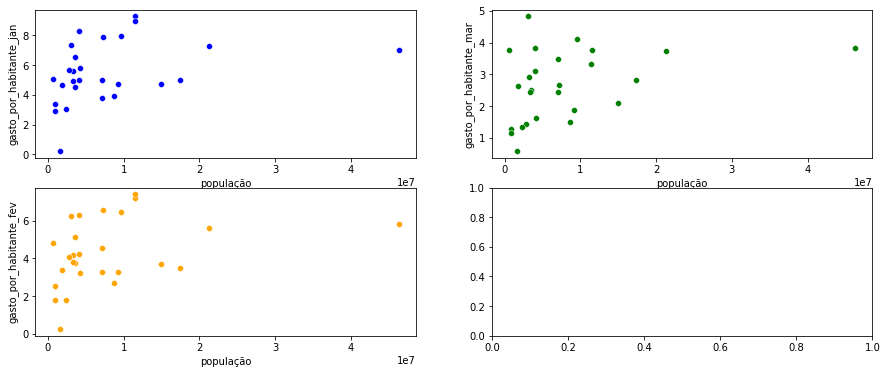

In [1198]:
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
  unida_retorno_gastos = unida_retorno[["população", "gasto_por_habitante_jan","gasto_por_habitante_fev","gasto_por_habitante_mar"]] 
  sns.scatterplot(ax = axes[0,0],data=unida_retorno_gastos, x="população",y='gasto_por_habitante_jan', color = "blue")
  sns.scatterplot(ax = axes[1,0],data=unida_retorno_gastos, x="população",y='gasto_por_habitante_fev', color = "orange")
  sns.scatterplot(ax = axes[0,1],data=unida_retorno_gastos, x="população",y='gasto_por_habitante_mar', color = "green")

Abaixo vamos fazer uma análise individual dos meses para os meses de janeiro, fevereiro e marco. Percebe-se uma tendência de queda no valor de gastos por habitantes nos estados brasileiros

Text(0, 0.5, 'Gastos por habitante em R$')

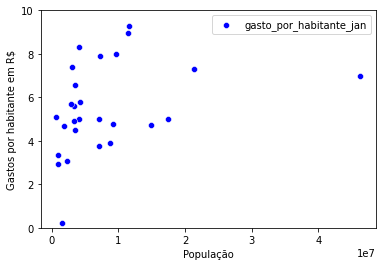

In [1199]:
unida_retorno_gastos = unida_retorno[["população", "gasto_por_habitante_jan","gasto_por_habitante_fev","gasto_por_habitante_mar"]] 
sns.scatterplot(data=unida_retorno_gastos, x="população",y='gasto_por_habitante_jan', color = "blue")
plt.ylim(0,10)

plt.legend(labels=["gasto_por_habitante_jan"])
plt.xlabel("População")
plt.ylabel("Gastos por habitante em R$")

Text(0, 0.5, 'Gastos por habitante em R$')

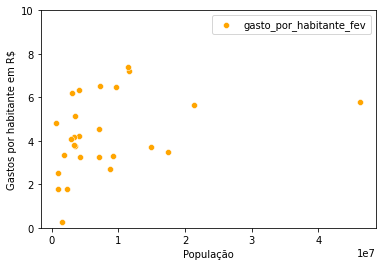

In [1200]:
sns.scatterplot(data=unida_retorno_gastos, x="população",y='gasto_por_habitante_fev', color = "orange")
plt.ylim(0,10)

plt.legend(labels=["gasto_por_habitante_fev"])
plt.xlabel("População")
plt.ylabel("Gastos por habitante em R$")

Text(0, 0.5, 'Gastos por habitante em R$')

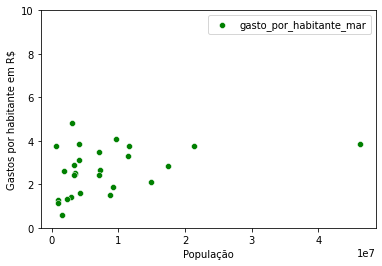

In [1201]:
sns.scatterplot(data=unida_retorno_gastos, x="população",y='gasto_por_habitante_mar', color = "green")
plt.ylim(0,10)

plt.legend(labels=["gasto_por_habitante_mar"])
plt.xlabel("População")
plt.ylabel("Gastos por habitante em R$")

Hipoteses:
* Menor repasse de verba para saúde nos estados?
* Será que tem a ver com a dimnuição de repasse para os estados para o Covid-19? (https://g1.globo.com/economia/noticia/2021/04/23/gastos-extraordinarios-do-governo-contra-covid-caem-de-r-524-bi-em-2020-para-r-103-bi-em-2021.ghtml)
* Será que devido ao destanciamento social e as medidas de prevenção dimuiu o número de pessoas na saúde pública? 